<a href="https://colab.research.google.com/github/aisehiradamla/CAPM/blob/main/CAPM(Capital_Asset_Pricing_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAPITAL ASSET PRICING MODEL**

The Capital Asset Pricing Model (CAPM) is a financial model used to determine the expected return of an asset based on its level of risk and the overall market's expected return. It provides a formula that takes into account the risk-free rate, the beta of the investment, and the expected return of the market to estimate the expected return of an asset. CAPM is a widely used tool in finance for evaluating investment opportunities and assessing the risk-return tradeoff.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

In [ ]:
stocks=pd.read_excel("/content/CAPM MODEL DATA (1).xlsx")

In [ ]:
stocks.head()

,DATE,GE,IBM,FORD,MSFT,DIS,XOM,MKT,RISKFREE
0,30-01-1998,0.056218,-0.056153,0.058842,0.154255,0.080884,-0.030644,0.004502,0.004480
1,27-02-1998,0.003226,0.059620,0.109069,0.136154,0.047368,0.081728,0.073303,0.004480
2,31-03-1998,0.112379,-0.005386,0.145856,0.056047,-0.046343,0.060784,0.051301,0.004519
3,30-04-1998,-0.011603,0.115523,0.086181,0.006983,0.168337,0.080407,0.010903,0.004503
4,29-05-1998,-0.021277,0.015922,0.132333,-0.058946,-0.090818,-0.029461,-0.025748,0.004488


In [ ]:
stocks.shape

(132, 9)

Data has 132 rows(observation) and 10 columns.

In [ ]:
df = pd.DataFrame(data=stocks)

In [ ]:
df=df.set_index(pd.DatetimeIndex(df["DATE"].values)) # We need to index date 

In [ ]:
df

,DATE,GE,IBM,FORD,MSFT,DIS,XOM,MKT,RISKFREE
1998-01-30,30-01-1998,0.056218,-0.056153,0.058842,0.154255,0.080884,-0.030644,0.004502,0.004480
1998-02-27,27-02-1998,0.003226,0.059620,0.109069,0.136154,0.047368,0.081728,0.073303,0.004480
1998-03-31,31-03-1998,0.112379,-0.005386,0.145856,0.056047,-0.046343,0.060784,0.051301,0.004519
1998-04-30,30-04-1998,-0.011603,0.115523,0.086181,0.006983,0.168337,0.080407,0.010903,0.004503
1998-05-29,29-05-1998,-0.021277,0.015922,0.132333,-0.058946,-0.090818,-0.029461,-0.025748,0.004488
...,...,...,...,...,...,...,...,...,...
2008-08-29,29-08-2008,-0.006716,-0.044929,-0.070833,0.065319,0.065898,-0.000249,0.010564,0.002149
2008-09-30,30-09-2008,-0.081495,-0.039185,0.165919,-0.021986,-0.051314,-0.029371,-0.098005,0.003282
2008-10-31,31-10-2008,-0.234902,-0.205113,-0.578846,-0.163357,-0.155751,-0.045583,-0.184603,0.004018
2008-11-28,28-11-2008,-0.119939,-0.116919,0.228310,-0.088670,-0.130837,0.086751,-0.084614,0.001717


In [ ]:
stocks.dtypes

DATE         object
GE          float64
IBM         float64
FORD        float64
MSFT        float64
DIS         float64
XOM         float64
MKT         float64
RISKFREE    float64
dtype: object

**DATA** **DICTIONARY** 

In [ ]:
stocks.columns

Index(['DATE', 'GE', 'IBM', 'FORD', 'MSFT', 'DIS', 'XOM', 'MKT', 'RISKFREE'], dtype='object')



 **GE**:(General Electric Company)

*Sector*(s): Industrials

*Industry*: Specialty Industrial Machinery
 
 **IBM**:(International Business Machines Corporation)

*Sector*(s): Technology

*Industry*: Information Technology Services


 **FORD**:(Forward Industries, Inc.)

*Sector*(s): Consumer Cyclical

*Industry*: Footwear & Accessories


 **MSFT**:(Microsoft Corporation )

*Sector*(s): Technology

*Industry*: Software—Infrastructure


 **DIS**:(The Walt Disney Company)

*sector*(s): Communication Services

*Industry*: Entertainment

 **XOM**:(Exxon Mobil Corporation)

*Sector*(s): Energy

*Industry*: Oil & Gas Integrated

 **MKT**: (The rate of return on the market portfolio )

 **RISKFREE**( The rate of return on the 
risk free asset)

In [ ]:
stocks.isnull().sum()#Checiking missing values 

DATE        0
GE          0
IBM         0
FORD        0
MSFT        0
DIS         0
XOM         0
MKT         0
RISKFREE    0
dtype: int64

The dataset has no missing values. 

**SUMMARY** **STATISTIC**

In [ ]:
stocks.describe()

,GE,IBM,FORD,MSFT,DIS,XOM,MKT,RISKFREE
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.001361,0.008332,-0.003950,0.008557,0.001379,0.010488,0.002522,0.003093
std,0.069934,0.090485,0.130211,0.109361,0.080866,0.053417,0.048463,0.001464
min,-0.234902,-0.226453,-0.578846,-0.343529,-0.267794,-0.116462,-0.184603,0.000846
25%,-0.032974,-0.038707,-0.082942,-0.056052,-0.043638,-0.028031,-0.022977,0.001504
50%,-0.004716,0.006482,-0.013232,0.003996,0.005858,0.003309,0.010868,0.003466
75%,0.040096,0.051488,0.060733,0.056916,0.047858,0.041534,0.037938,0.004329
max,0.192392,0.353799,0.444056,0.407781,0.241453,0.232171,0.083832,0.005325


 **BETA** 

Beta (β), which is mostly employed in the capital asset pricing model (CAPM), is a measurement of a security or portfolio's volatility—or systematic risk—in comparison to the market as a whole.

**The** **Calculation** **for** **Beta** **Is** **As** **Follows**:

\begin{aligned} &\text{Beta coefficient}(\beta) = \frac{\text{Covariance}(R_e, R_m)}{\text{Variance}(R_m)} \\ &\textbf{where:}\\ &R_e=\text{the return on an individual stock}\\ &R_m=\text{the return on the overall market}\\ &\text{Covariance}=\text{how changes in a stock's returns are} \\ &\text{related to changes in the market's returns}\\ &\text{Variance}=\text{how far the market's data points spread} \\ &\text{out from their average value} \\ \end{aligned} 


​
"What Is Beta In Finance, And How Is It Calculated?". Investopedia, 2022, https://www.investopedia.com/terms/b/beta.asp.
  





*   The stock must be tied to the benchmark used in the calculation for the beta to have any significance.
*   The beta for the S&P 500 is 1.0





*  If the Beta of an individual stock = 1.0, this means its price is perfectly correlated with the market

*  If Beta < 1.0, which is referred to as 'defensive', this indicates the security is theoretically less volatile than the market


* If Beta > 1.0, or 'aggressive', this indicates the assets price is more volatile than the market

In [ ]:
from sklearn.linear_model import LinearRegression #for comparing the beta values 

**Calculating** **each** **variable**'**s** **BETA**.

In [ ]:
covariance=stocks.cov()

In [ ]:
variance=stocks["MKT"].var()

In [ ]:
variance

0.002348678959175341

In [ ]:
Beta_allStocks=covariance.loc["MKT"]/variance # Beta for all stocks 

In [ ]:
Beta_allStocks

GE          0.904096
IBM         1.190494
FORD        1.316384
MSFT        1.321046
DIS         0.897774
XOM         0.415981
MKT         1.000000
RISKFREE   -0.000185
Name: MKT, dtype: float64

**MSFT**(**Microsoft** **corporation**)

In [ ]:
#beta_msft=covariance.loc["MSFT","MKT"]/variance #Beta value for MSFT
#one way of to calculate the beta value of stock 

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_msft=stocks["MSFT"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_msft)

Y_msft_pred=linear_regression.predict(X)

alpha_msft=linear_regression.intercept_[0]
beta_msft=linear_regression.coef_[0,0]


In [ ]:
alpha_msft 

0.00413501684174724

Alpha_msft the  is intercept of the equation. 




* **NOTE**: In order to calculate the CAPM model, we first need to calculate the Beta value of each stock.






In [ ]:
beta_msft

1.3201181295100846

**BETA** **OF** **MSFT**: 

1.32 is the Beta value of  **MSFT**(Microsoft Corporation ). As a result, if the market as a whole rises by 10%, Microsoft Company Stock is forecast to rise 13.2%. In other words, MSFT loses 13.2% if the market falls 10%. (Beta value of Microsoft Corporation is greater than 1.0 ). 

**Visualize** **MSFT**

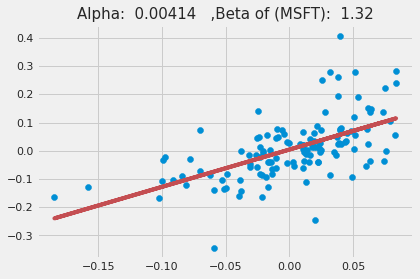

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:  " + str(round(alpha_msft,5))+"   ,Beta of (MSFT):  " + str(round(beta_msft,3)), fontsize=15)
ax.scatter(X,Y_msft)
ax.plot(X,Y_msft_pred, c="r")

**Analysis** **of** **MSFT** **chart**

* As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta* rm + alpha(y=beta_msft* rm +alpha_msft) is the equation for a straight line.



**CAPITAL** **PRICE** **ASSET** **MODEL** **FOR** (**MSFT**) 

In [ ]:
risk_free=stocks["RISKFREE"].mean()*10
risk_free

0.0309293446969697

In [ ]:
market_return=stocks["MKT"].mean()*120
market_return

0.3026381818181819

In [ ]:
expected_return_of_msft= risk_free  + beta_msft*(market_return-risk_free )

In [ ]:
expected_return_of_msft

0.38961710652878456

**Evaluation** **of** **MSFT**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Coefficient of Determination:", r2_score(Y_msft, Y_msft_pred))
print("Mean squared  Error:", mean_squared_error(Y_msft, Y_msft_pred))

Coefficient of Determination: 0.3469647277296313
Mean squared  Error: 0.0077036223463709565


R square of MSFT is 0.34 

**GE**:(**General** **Electric** **Company**)

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_ge=stocks["GE"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_ge)

Y_ge_pred=linear_regression.predict(X)

alpha_ge=linear_regression.intercept_[0]
beta_ge=linear_regression.coef_[0,0]

In [ ]:
alpha_ge #intercept of equation 

-0.0013234046439960395

In [ ]:
beta_ge

0.9037515480008563

**BETA** **OF** **GE**

The beta of **GE** is 0.90. (General Electric Company). As a result, the stock of General Electric Company is expected to increase by 9% if the market as a whole increases by 10%. In other words, if the market declines 10%, GE loses 9%. (General Electric Company's beta value is less than 1.0.)

**Visualize** **GE**

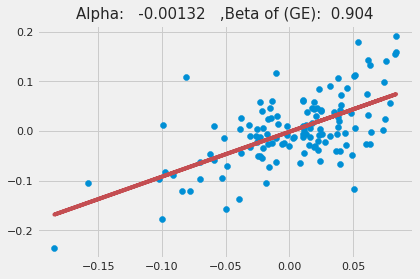

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:   " + str(round(alpha_ge,5))+"   ,Beta of (GE):  " + str(round(beta_ge,3)), fontsize=15)
ax.scatter(X,Y_ge)
ax.plot(X,Y_ge_pred, c="r")

**Analysis** **of** **GE** **chart**

* As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta* rm + alpha(y=beta_ge *rm +alpha_ge) is the equation for a straight line.

In [ ]:
#beta_ge= covariance.loc["GE","MKT"]/variance # Beta value for GE
#beta_ge

**CAPITAL** **PRICE** **ASSET** **MODEL** **FOR** (**GE**) 

In [ ]:
expected_return_of_ge= risk_free + beta_ge*(market_return - risk_free)

In [ ]:
expected_return_of_ge

0.27648662685077774

**Evaluation** **of** **GE**

In [ ]:
print("Coefficient of Determination:", r2_score(Y_ge, Y_ge_pred))
print("Mean squared  Error:", mean_squared_error(Y_ge, Y_ge_pred))

Coefficient of Determination: 0.3940959688850575
Mean squared  Error: 0.0029492938057999194


**IBM**:(**International** **Business** **Machines** **Corporation**)

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_ibm=stocks["IBM"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_ibm)

Y_ibm_pred=linear_regression.predict(X)

alpha_ibm=linear_regression.intercept_[0]
beta_ibm=linear_regression.coef_[0,0]

In [ ]:
alpha_ibm

0.005838507482369621

In [ ]:
beta_ibm

1.1909272832204014

**BETA** **OF** **IBM**

The beta of IBM is 1.19. (IBM:International Business Machines Corporation). As a result, the stock of International Business Machines Corporation is expected to increase by 11.9% if the market as a whole increases by 10%. In other words, if the market declines 10%, IBM loses 11.2%. (International Business Machines Corporation) beta value is greater than 1.0.)

**Visualize** **IBM**

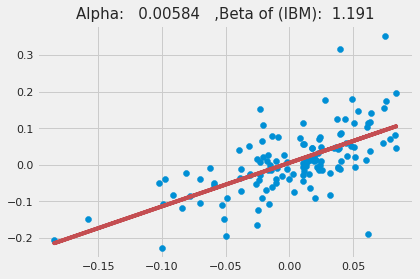

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:   " + str(round(alpha_ibm,5))+"   ,Beta of (IBM):  " + str(round(beta_ibm,3)), fontsize=15)
ax.scatter(X,Y_ibm)
ax.plot(X,Y_ibm_pred, c="r")

**Analysis** **of** **IBM** **chart**

* As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta* *rm + alpha(y=beta_ibm**rm +alpha_ibm) is the equation for a straight line.

**CAPITAL** **PRICE** **ASSET** **MODEL** **FOR** (**IBM**) 

In [ ]:
expected_return_of_ibm= risk_free + beta_ibm*(market_return - risk_free)

In [ ]:
expected_return_of_ibm

0.3545148119167095

**Evaluation** **of** **IBM**

In [ ]:
print("Coefficient of Determination:", r2_score(Y_ibm, Y_ibm_pred))
print("Mean squared  Error:", mean_squared_error(Y_ibm, Y_ibm_pred))

Coefficient of Determination: 0.40844930055152284
Mean squared  Error: 0.004824389748971233


**FORD**:(**Forward** **Industries**, **Inc**.)

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_ford=stocks["FORD"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_ford)

Y_ford_pred=linear_regression.predict(X)

alpha_ford=linear_regression.intercept_[0]
beta_ford=linear_regression.coef_[0,0]

In [ ]:
alpha_ford

-0.007728474760261873

In [ ]:
beta_ford

1.3159932813468505

**BETA** **OF** **FORD**

The beta of **FORD** is 1.31. (Forward Industries, Inc.). As a result, the stock of Forward Industries, Inc.  is expected to increase by 13.1% if the market as a whole increases by 10%. In other words, if the market declines 10%, FORD loses 13.1%.( Forward Industries, Inc.'s beta value is greater than 1.0.)

**Visualize** (**FORD**) 

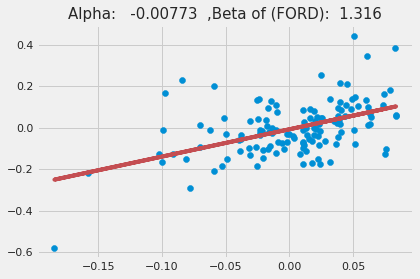

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:   " + str(round(alpha_ford,5))+"  ,Beta of (FORD):  " + str(round(beta_ford,3)), fontsize=15)
ax.scatter(X,Y_ford)
ax.plot(X,Y_ford_pred, c="r")

**Analysis** **of** **FORD** **chart**

As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta*rm + alpha(y=beta_ford**rm +alpha_ford) is the equation for a straight line.

**Capital** **price** **asset** **model** **for** (**FORD**) 

In [ ]:
expected_return_of_ford= risk_free + beta_ford*(market_return - risk_free)

In [ ]:
expected_return_of_ford

0.38849634883105066

**Evaluation** **of** **FORD**

In [ ]:
print("Coefficient of Determination:", r2_score(Y_ford, Y_ford_pred))
print("Mean squared  Error:", mean_squared_error(Y_ford, Y_ford_pred))

Coefficient of Determination: 0.2403309774999618
Mean squared  Error: 0.01285701319182299


**DIS**:(**The** **Walt** **Disney** **Company**)

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_dis=stocks["DIS"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_dis)

Y_dis_pred=linear_regression.predict(X)

alpha_dis=linear_regression.intercept_[0]
beta_dis=linear_regression.coef_[0,0]

In [ ]:
alpha_dis

-0.0014775539780241987

In [ ]:
beta_dis

0.8972703140108715

**BETA** **OF** **DIS**

The beta of DIS is 0.89. (The Walt Disney Company)). As a result, the stock of The Walt Disney Company is expected to increase by 8.9% if the market as a whole increases by 10%. In other words, if the market declines 10%, DIS loses 8.9%.(The Walt Disney Company's beta value is less than 1.0.)

**Visualize** (**DIS**)

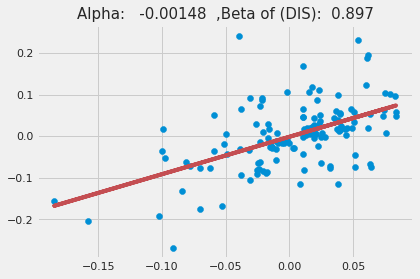

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:   " + str(round(alpha_dis,5))+"  ,Beta of (DIS):  " + str(round(beta_dis,3)), fontsize=15)
ax.scatter(X,Y_dis)
ax.plot(X,Y_dis_pred, c="r")

**Analysis** **of** **DIS** **chart**

As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta* rm + alpha(y=beta_dis *rm +alpha_dis) is the equation for a straight line.

**Capital** **price** **asset** **model** **for** (**DIS**)

In [ ]:
expected_return_of_dis= risk_free + beta_dis*(market_return - risk_free)

In [ ]:
expected_return_of_dis

0.2747256183002485

**Evaluation** **of** **DIS**

In [ ]:
print("Coefficient of Determination:", r2_score(Y_dis, Y_dis_pred))
print("Mean squared  Error:", mean_squared_error(Y_dis, Y_dis_pred))

Coefficient of Determination: 0.29132444289254367
Mean squared  Error: 0.00459976039037452


**XOM**:(**Exxon** **Mobil** **Corporation**)

In [ ]:
X=stocks["MKT"].iloc[1:].to_numpy().reshape(-1,1)
Y_xom=stocks["XOM"].iloc[1:].to_numpy().reshape(-1,1)

linear_regression=LinearRegression()
linear_regression.fit(X,Y_xom)

Y_xom_pred=linear_regression.predict(X)

alpha_xom=linear_regression.intercept_[0]
beta_xom=linear_regression.coef_[0,0]

In [ ]:
alpha_xom

0.009758072306064756

In [ ]:
beta_xom

0.41625313004115955

**BETA** **OF** **XOM**

The beta of DIS is 0.41. (Exxon Mobil Corporation). As a result, the stock of Exxon Mobil Corporation is expected to increase by 4.1% if the market as a whole increases by 10%. In other words, if the market declines 10%, XOM loses 4.1%.(Exxon Mobil Corporation's beta value is less than 1.0.)

**Visualize** (**XOM**)

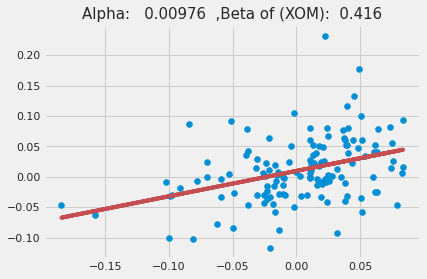

In [ ]:
fig,ax= plt.subplots()
ax.set_title("Alpha:   " + str(round(alpha_xom,5))+"  ,Beta of (XOM):  " + str(round(beta_xom,3)), fontsize=15)
ax.scatter(X,Y_xom)
ax.plot(X,Y_xom_pred, c="r")

**Analysis** **of** **XOM** **chart**

As previously mentioned, the beta is a technique to measure a stock's volatility to the volatility of the entire market. Furthermore, the regression also produces the intercept, commonly referred to as "alpha." y = beta* rm + alpha(y=beta_xom *rm +alpha_xom) is the equation for a straight line.

**Capital** **price** **asset** **model** **for** (**XOM**)

In [ ]:
expected_return_of_xom= risk_free + beta_xom*(market_return - risk_free)

In [ ]:
expected_return_of_xom

0.14402899860851787

**Evaluation** **of** **XOM**

In [ ]:
print("Coefficient of Determination:", r2_score(Y_xom, Y_xom_pred))
print("Mean squared  Error:", mean_squared_error(Y_xom, Y_xom_pred))

Coefficient of Determination: 0.14327360199803518
Mean squared  Error: 0.002433375184754488
